In [1]:
import numpy as np
import pandas as pd

In [2]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
yelp['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [ ]:
## We define a column with the text length

In [9]:
yelp['text_length'] = yelp['text'].apply(len)

In [ ]:
# EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

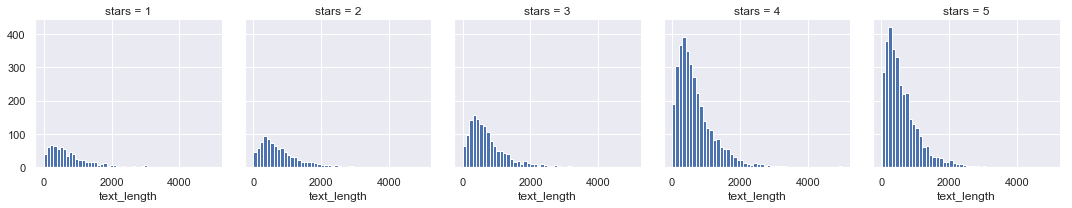

In [14]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text_length',bins = 50)
plt.show()

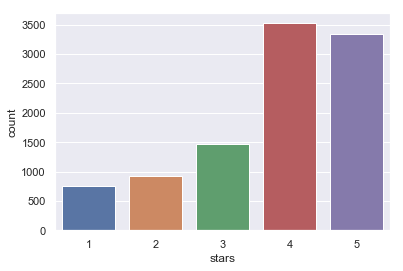

In [17]:
sns.countplot(x = 'stars',data = yelp)
plt.show()

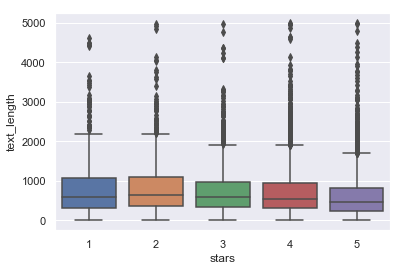

In [19]:
sns.boxplot(x='stars',y='text_length',data=yelp)
plt.show()

In [20]:
yelp.groupby('stars').mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [21]:
## We will stick to reviews with either 1 start or 5 stars. We'll have two classes

In [68]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [69]:
X = yelp_class['text']
y = yelp_class['stars']

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
cv = CountVectorizer()

In [72]:
X_trans = cv.fit_transform(X)

In [73]:
## Train/test split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=101)

In [76]:
# Training

In [77]:
## We start with multinomial Naive Bayes

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
nb_clf = MultinomialNB()

In [80]:
nb_clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
y_train_predict = nb_clf.predict(X_train)

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
print(confusion_matrix(y_train,y_train_predict))
print('===='*15)
print(classification_report(y_train,y_train_predict))

[[ 459   62]
 [  10 2329]]
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       521
           5       0.97      1.00      0.98      2339

    accuracy                           0.97      2860
   macro avg       0.98      0.94      0.96      2860
weighted avg       0.97      0.97      0.97      2860



In [84]:
## we try on test set

In [85]:
y_test_predict = nb_clf.predict(X_test)

In [86]:
print(confusion_matrix(y_test,y_test_predict))
print('===='*15)
print(classification_report(y_test,y_test_predict))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [ ]:
## the result is reasonably good, although is probably overfitting.

In [ ]:
# We add a tf-idf and put everything into a pipeline

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer())
])

In [50]:
X = yelp_class['text']
y = yelp_class['stars']

In [51]:
X_trans = pipeline.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.33, random_state=42)

In [53]:
nb_clf = MultinomialNB()

In [54]:
nb_clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
y_train_predict = nb_clf.predict(X_train)

In [56]:
print(confusion_matrix(y_train,y_train_predict))
print('===='*15)
print(classification_report(y_train,y_train_predict))

[[   1  487]
 [   0 2249]]
              precision    recall  f1-score   support

           1       1.00      0.00      0.00       488
           5       0.82      1.00      0.90      2249

    accuracy                           0.82      2737
   macro avg       0.91      0.50      0.45      2737
weighted avg       0.85      0.82      0.74      2737



In [ ]:
## So, tf-idf made everything worse

In [ ]:
######################################

In [ ]:
# We now add the other classes

In [144]:
X = yelp['text']
y = yelp['stars']

In [145]:
cv = CountVectorizer()

In [146]:
X_trans = cv.fit_transform(X)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=101)

In [91]:
nb_clf = MultinomialNB()

nb_clf.fit(X_train,y_train)

In [93]:
y_train_predict = nb_clf.predict(X_train)

In [94]:
print(confusion_matrix(y_train,y_train_predict))
print('===='*15)
print(classification_report(y_train,y_train_predict))

[[ 330    7   26  133   33]
 [   7  309   33  275   30]
 [   2    2  505  461   48]
 [   7    3    2 2261  189]
 [   1    0    2  442 1892]]
              precision    recall  f1-score   support

           1       0.95      0.62      0.75       529
           2       0.96      0.47      0.63       654
           3       0.89      0.50      0.64      1018
           4       0.63      0.92      0.75      2462
           5       0.86      0.81      0.84      2337

    accuracy                           0.76      7000
   macro avg       0.86      0.66      0.72      7000
weighted avg       0.80      0.76      0.75      7000



In [95]:
conf_mx = confusion_matrix(y_train,y_train_predict)

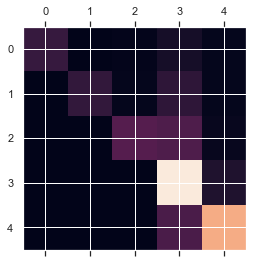

In [96]:
plt.matshow(conf_mx)
plt.show()

In [98]:
row_sums = conf_mx.sum(axis=1,keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx,0)

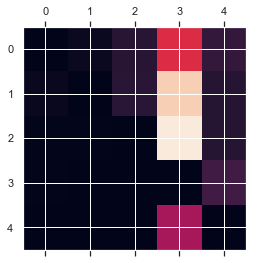

In [99]:
plt.matshow(norm_conf_mx)
plt.show()

In [ ]:
## The model has trouble classifying 3s. In particular, it is classifing 3s as 2s a lot.

In [ ]:
## Let's try on test set.

In [118]:
y_test_predict = nb_clf.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
print('===='*15)
print(classification_report(y_test,y_test_predict))

[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]
              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

    accuracy                           0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000



In [ ]:
## so, not impresive in test, which means it overfits.

In [100]:
## We try other classifiers

In [103]:
from sklearn.svm import SVC

In [104]:
svc_clf = SVC()

In [105]:
svc_clf.fit(X_train,y_train)

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [106]:
y_train_predict = svc_clf.predict(X_train)

In [107]:
print(confusion_matrix(y_train,y_train_predict))
print('===='*15)
print(classification_report(y_train,y_train_predict))

[[   0    0    0  233  296]
 [   0    0    0  348  306]
 [   0    0    0  507  511]
 [   0    0    0  992 1470]
 [   0    0    0  577 1760]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       529
           2       0.00      0.00      0.00       654
           3       0.00      0.00      0.00      1018
           4       0.37      0.40      0.39      2462
           5       0.41      0.75      0.53      2337

    accuracy                           0.39      7000
   macro avg       0.16      0.23      0.18      7000
weighted avg       0.27      0.39      0.31      7000



/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
##############

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
forest_clf = RandomForestClassifier()

In [150]:
forest_clf.fit(X_train,y_train)

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
y_train_predict = forest_clf.predict(X_train)

In [152]:
print(confusion_matrix(y_train,y_train_predict))
print('===='*15)
print(classification_report(y_train,y_train_predict))

[[ 517    0    2    5    5]
 [   0  649    0    2    3]
 [   2    0 1004    7    5]
 [   0    1    1 2448   12]
 [   0    0    2   26 2309]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       529
           2       1.00      0.99      1.00       654
           3       1.00      0.99      0.99      1018
           4       0.98      0.99      0.99      2462
           5       0.99      0.99      0.99      2337

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [153]:
## It is considerably better

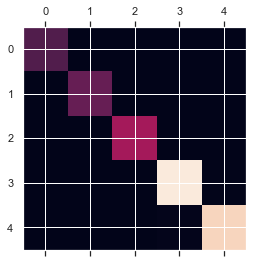

In [154]:
conf_mx = confusion_matrix(y_train,y_train_predict)
plt.matshow(conf_mx)
plt.show()

In [155]:
row_sums = conf_mx.sum(axis=1,keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx,0)

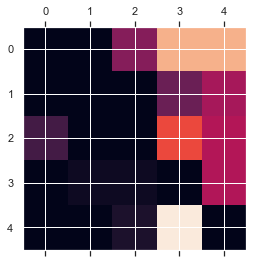

In [156]:
plt.matshow(norm_conf_mx)
plt.show()

In [157]:
## Let's try on test set. The model is probably overfiting.

In [158]:
y_test_predict = forest_clf.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
print('===='*15)
print(classification_report(y_test,y_test_predict))

[[ 28  22  20  79  71]
 [ 16  22  45 129  61]
 [ 10  12  67 258  96]
 [ 10  17  66 611 360]
 [  9  18  47 409 517]]
              precision    recall  f1-score   support

           1       0.38      0.13      0.19       220
           2       0.24      0.08      0.12       273
           3       0.27      0.15      0.19       443
           4       0.41      0.57      0.48      1064
           5       0.47      0.52      0.49      1000

    accuracy                           0.41      3000
   macro avg       0.36      0.29      0.30      3000
weighted avg       0.39      0.41      0.39      3000



In [ ]:
## So, it is indeed overfiting. We try K-fold validation.

In [159]:
from sklearn.model_selection import cross_val_predict

In [160]:
y_train_predict = cross_val_predict(forest_clf,X_train,y_train,cv=10)

In [161]:
print(confusion_matrix(y_train,y_train_predict))
print('===='*15)
print(classification_report(y_train,y_train_predict))

[[  75   43   55  232  124]
 [  42   50  102  309  151]
 [  22   46  149  563  238]
 [  34   57  162 1391  818]
 [  18   29  112 1044 1134]]
              precision    recall  f1-score   support

           1       0.39      0.14      0.21       529
           2       0.22      0.08      0.11       654
           3       0.26      0.15      0.19      1018
           4       0.39      0.56      0.46      2462
           5       0.46      0.49      0.47      2337

    accuracy                           0.40      7000
   macro avg       0.34      0.28      0.29      7000
weighted avg       0.38      0.40      0.37      7000



In [ ]:
## After k-fold, over fit is gone. Doesn't look so shiny no more

In [ ]:
# I try on test:

In [162]:
y_test_predict = forest_clf.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
print('===='*15)
print(classification_report(y_test,y_test_predict))

[[ 28  22  20  79  71]
 [ 16  22  45 129  61]
 [ 10  12  67 258  96]
 [ 10  17  66 611 360]
 [  9  18  47 409 517]]
              precision    recall  f1-score   support

           1       0.38      0.13      0.19       220
           2       0.24      0.08      0.12       273
           3       0.27      0.15      0.19       443
           4       0.41      0.57      0.48      1064
           5       0.47      0.52      0.49      1000

    accuracy                           0.41      3000
   macro avg       0.36      0.29      0.30      3000
weighted avg       0.39      0.41      0.39      3000



In [163]:
## No longer overfit.

In [164]:
## Try adding tf-idf

In [165]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer())
])

X = yelp['text']
y = yelp['stars']

X_trans = pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.33, random_state=42)

forest_clf = RandomForestClassifier()

forest_clf.fit(X_train,y_train)

y_train_predict = forest_clf.predict(X_train)

print(confusion_matrix(y_train,y_train_predict))
print('===='*15)
print(classification_report(y_train,y_train_predict))

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[ 500    1    1    3    1]
 [   0  624    2    5    5]
 [   1    0  963    9    6]
 [   2    0    3 2339    3]
 [   1    0    2   24 2205]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       506
           2       1.00      0.98      0.99       636
           3       0.99      0.98      0.99       979
           4       0.98      1.00      0.99      2347
           5       0.99      0.99      0.99      2232

    accuracy                           0.99      6700
   macro avg       0.99      0.99      0.99      6700
weighted avg       0.99      0.99      0.99      6700



In [166]:
y_test_predict = forest_clf.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
print('===='*15)
print(classification_report(y_test,y_test_predict))

[[ 25  19  19  97  83]
 [ 17  30  41 141  62]
 [ 13  18  75 247 129]
 [ 16  21  85 649 408]
 [  8  10  58 481 548]]
              precision    recall  f1-score   support

           1       0.32      0.10      0.16       243
           2       0.31      0.10      0.15       291
           3       0.27      0.16      0.20       482
           4       0.40      0.55      0.46      1179
           5       0.45      0.50      0.47      1105

    accuracy                           0.40      3300
   macro avg       0.35      0.28      0.29      3300
weighted avg       0.38      0.40      0.38      3300



In [ ]:
# Overfit all over again. We try K-fold validation.

In [167]:
y_train_predict = cross_val_predict(forest_clf,X_train,y_train,cv=10)
print(confusion_matrix(y_train,y_train_predict))
print('===='*15)
print(classification_report(y_train,y_train_predict))

[[  62   39   44  193  168]
 [  44   45   85  312  150]
 [  17   41  118  564  239]
 [  31   50  164 1319  783]
 [  20   28   96 1002 1086]]
              precision    recall  f1-score   support

           1       0.36      0.12      0.18       506
           2       0.22      0.07      0.11       636
           3       0.23      0.12      0.16       979
           4       0.39      0.56      0.46      2347
           5       0.45      0.49      0.47      2232

    accuracy                           0.39      6700
   macro avg       0.33      0.27      0.27      6700
weighted avg       0.37      0.39      0.36      6700



In [168]:
y_test_predict = forest_clf.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
print('===='*15)
print(classification_report(y_test,y_test_predict))

[[ 25  19  19  97  83]
 [ 17  30  41 141  62]
 [ 13  18  75 247 129]
 [ 16  21  85 649 408]
 [  8  10  58 481 548]]
              precision    recall  f1-score   support

           1       0.32      0.10      0.16       243
           2       0.31      0.10      0.15       291
           3       0.27      0.16      0.20       482
           4       0.40      0.55      0.46      1179
           5       0.45      0.50      0.47      1105

    accuracy                           0.40      3300
   macro avg       0.35      0.28      0.29      3300
weighted avg       0.38      0.40      0.38      3300



In [169]:
## It is slightly better without tfidf.

In [ ]:
## Let's try Grid Search. Only CountVectorizer.

In [170]:
X = yelp['text']
y = yelp['stars']

cv = CountVectorizer()
X_trans = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=101)

In [175]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30,40,50,60,70], 'max_features': [2,4,6,8,9,10]},
]

In [176]:
forest_clf=RandomForestClassifier()

grid_search = GridSearchCV(forest_clf,param_grid,cv=5,
                          return_train_score=True)

In [177]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [178]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 70}

In [174]:
#grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [180]:
best_clf = grid_search.best_estimator_

In [181]:
y_test_predict = best_clf.predict(X_test)

In [182]:
print(classification_report(y_test,y_test_predict))
print(confusion_matrix(y_test,y_test_predict))

              precision    recall  f1-score   support

           1       0.38      0.01      0.03       220
           2       0.33      0.00      0.01       273
           3       0.53      0.02      0.04       443
           4       0.39      0.62      0.48      1064
           5       0.44      0.56      0.50      1000

    accuracy                           0.41      3000
   macro avg       0.41      0.24      0.21      3000
weighted avg       0.42      0.41      0.34      3000

[[  3   1   3 119  94]
 [  3   1   5 190  74]
 [  1   1  10 300 131]
 [  0   0   1 658 405]
 [  1   0   0 436 563]]
